In [81]:
#!pip install pandas

In [82]:
#pip install --upgrade pip

In [83]:
#!pip install matplotlib

In [84]:
# Install seaborn if not already installed
#%pip install seaborn

In [85]:
# Install scikit-learn if not already installed
#%pip install scikit-learn

In [86]:
# Install xgboost if not already installed
#%pip install xgboost

In [87]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix # Import precision_score and recall_score
from xgboost import XGBClassifier     

In [88]:
# Read multiple CSV files
calendar = pd.read_csv("../data/dim_calendar.csv")  # Calendar File
customer = pd.read_csv("../data/dim_customers.csv") # Customers File
location = pd.read_csv("../data/dim_location.csv")  # Location File
payment = pd.read_csv("../data/dim_payments.csv")  # Payments File
transcation = pd.read_csv("../data/dim_transactions.csv")  # Transcations File

In [89]:
calendar.head()

,date_key,day_of_week,month,year,quarter,is_holiday
0,2020-01-01,Wednesday,January,2020,2020Q1,0
1,2020-01-02,Thursday,January,2020,2020Q1,0
2,2020-01-03,Friday,January,2020,2020Q1,0
3,2020-01-04,Saturday,January,2020,2020Q1,1
4,2020-01-05,Sunday,January,2020,2020Q1,1


In [90]:
customer.head()

,customer_id,first_name,last_name,gender,age,dob,email,phone_number,is_churned,days_since_last_purchase,tenure,discount_used,last_purchase_date,purchase_frequency,avg_purchase_value
0,1,Patricia,Macdonald,Female,51,1973-12-16,wilsonchristopher@hotmail.com,(568)800-3705,1,590,3,0,2022-03-10,49,453.22
1,2,Destiny,Evans,Other,56,1968-07-13,garciarobert@meyers.info,3579858634,0,648,4,0,2024-07-02,23,49.87
2,3,Sarah,Stone,Other,21,2003-09-12,gregorynichols@contreras.info,(233)051-2972x83053,0,1783,10,0,2023-06-24,45,178.78
3,4,Tara,Peterson,Female,25,1999-06-04,wcaldwell@yahoo.com,+1-980-912-2768x5416,1,514,9,0,2022-10-09,48,408.14
4,5,Patrick,Petersen,Female,57,1967-11-21,matthew65@miller.com,001-770-382-4507x93902,0,689,2,1,2020-07-24,4,328.80


In [91]:
location.head()

,location_id,shopping_mall,city,province_state,country
0,1,Mall of America,Bloomington,Minnesota,US
1,2,The Galleria,Houston,Texas,US
2,3,Westfield London,London,England,UK
3,4,Trafford Centre,Manchester,England,UK
4,5,King of Prussia Mall,Philadelphia,Pennsylvania,US


In [92]:
payment.head()

,payment_id,payment_method,card_type,Unnamed: 3
0,1,Credit Card - Visa,Visa,NaN
1,2,Credit Card - MasterCard,MasterCard,NaN
2,3,Credit Card - AMEX,AMEX,NaN
3,4,Debit Card - Visa,Visa,NaN
4,5,Debit Card - MasterCard,MasterCard,NaN


In [93]:
transcation.head()

,invoice_no,category,item,quantity,price,location_id,customer_id,invoice_date,payment_id
0,100000,Hair Care,Hair Oil,1,17.45,1,398,2023-03-22,2
1,100001,Body Care and Hygiene,Deodorant,4,20.81,21,938,2024-04-06,9
2,100002,Skin Care,Face Wash,4,40.96,17,258,2022-05-31,10
3,100003,Body Care and Hygiene,Body Lotion,2,27.50,9,892,2021-01-01,10
4,100004,Oral Care,Toothpaste,1,16.43,55,978,2020-02-10,7


In [94]:
calendar.shape

(4018, 6)

In [95]:
calendar.columns

Index(['date_key', 'day_of_week', 'month', 'year', 'quarter', 'is_holiday'], dtype='object')

In [96]:
customer.shape

(999, 15)

In [97]:
customer.columns

Index(['customer_id', 'first_name', 'last_name', 'gender', 'age', 'dob',
       'email', 'phone_number', 'is_churned', 'days_since_last_purchase',
       'tenure', 'discount_used', 'last_purchase_date', 'purchase_frequency',
       'avg_purchase_value'],
      dtype='object')

In [98]:
location.shape

(60, 5)

In [99]:
location.columns

Index(['location_id', 'shopping_mall', 'city', 'province_state', 'country'], dtype='object')

In [100]:
payment.shape

(10, 4)

In [101]:
payment.columns

Index(['payment_id', 'payment_method', 'card_type', 'Unnamed: 3'], dtype='object')

In [102]:
transcation.shape

(10000, 9)

In [103]:
transcation.columns

Index(['invoice_no', 'category', 'item', 'quantity', 'price', 'location_id',
       'customer_id', 'invoice_date', 'payment_id'],
      dtype='object')

In [104]:
# Merge Calendar and Transaction table
merge_calendar_transaction = transcation.merge(calendar, left_on="invoice_date", right_on="date_key", how="left")
merge_calendar_transaction.head()

,invoice_no,category,item,quantity,price,location_id,customer_id,invoice_date,payment_id,date_key,day_of_week,month,year,quarter,is_holiday
0,100000,Hair Care,Hair Oil,1,17.45,1,398,2023-03-22,2,2023-03-22,Wednesday,March,2023,2023Q1,0
1,100001,Body Care and Hygiene,Deodorant,4,20.81,21,938,2024-04-06,9,2024-04-06,Saturday,April,2024,2024Q2,1
2,100002,Skin Care,Face Wash,4,40.96,17,258,2022-05-31,10,2022-05-31,Tuesday,May,2022,2022Q2,0
3,100003,Body Care and Hygiene,Body Lotion,2,27.50,9,892,2021-01-01,10,2021-01-01,Friday,January,2021,2021Q1,0
4,100004,Oral Care,Toothpaste,1,16.43,55,978,2020-02-10,7,2020-02-10,Monday,February,2020,2020Q1,0


In [105]:
merge_calendar_transaction.shape

(10000, 15)

In [106]:
calendar.shape

(4018, 6)

In [107]:
transcation.shape

(10000, 9)

In [108]:
# Merge New and Customer table
merge_customer_calendar_transaction = merge_calendar_transaction.merge(customer, on="customer_id", how="left")
merge_customer_calendar_transaction.head()

,invoice_no,category,item,quantity,price,location_id,customer_id,invoice_date,payment_id,date_key,...,dob,email,phone_number,is_churned,days_since_last_purchase,tenure,discount_used,last_purchase_date,purchase_frequency,avg_purchase_value
0,100000,Hair Care,Hair Oil,1,17.45,1,398,2023-03-22,2,2023-03-22,...,1999-07-13,michealbender@gmail.com,(309)938-3205x8088,1.0,1056.0,8.0,0.0,2021-08-15,30.0,280.82
1,100001,Body Care and Hygiene,Deodorant,4,20.81,21,938,2024-04-06,9,2024-04-06,...,1995-01-18,nicholasclark@flowers.net,(363)377-7602,1.0,1494.0,1.0,0.0,2020-01-19,30.0,52.40
2,100002,Skin Care,Face Wash,4,40.96,17,258,2022-05-31,10,2022-05-31,...,2002-10-11,geraldcastro@mosley.com,661-041-4070x466,0.0,386.0,6.0,1.0,2021-04-06,42.0,165.90
3,100003,Body Care and Hygiene,Body Lotion,2,27.50,9,892,2021-01-01,10,2021-01-01,...,1992-12-29,vguerrero@green.org,712-518-4596x428,0.0,482.0,3.0,1.0,2022-05-17,28.0,427.81
4,100004,Oral Care,Toothpaste,1,16.43,55,978,2020-02-10,7,2020-02-10,...,1989-08-17,qfloyd@gmail.com,249-201-6223,0.0,1309.0,2.0,1.0,2023-01-28,31.0,321.20


In [109]:
customer.columns

Index(['customer_id', 'first_name', 'last_name', 'gender', 'age', 'dob',
       'email', 'phone_number', 'is_churned', 'days_since_last_purchase',
       'tenure', 'discount_used', 'last_purchase_date', 'purchase_frequency',
       'avg_purchase_value'],
      dtype='object')

In [110]:
# Merge New and Location table
merge_location_customer_calendar_transaction = merge_customer_calendar_transaction.merge(location, on="location_id", how="left")
merge_location_customer_calendar_transaction.head()

,invoice_no,category,item,quantity,price,location_id,customer_id,invoice_date,payment_id,date_key,...,days_since_last_purchase,tenure,discount_used,last_purchase_date,purchase_frequency,avg_purchase_value,shopping_mall,city,province_state,country
0,100000,Hair Care,Hair Oil,1,17.45,1,398,2023-03-22,2,2023-03-22,...,1056.0,8.0,0.0,2021-08-15,30.0,280.82,Mall of America,Bloomington,Minnesota,US
1,100001,Body Care and Hygiene,Deodorant,4,20.81,21,938,2024-04-06,9,2024-04-06,...,1494.0,1.0,0.0,2020-01-19,30.0,52.40,Fashion Show Mall,Las Vegas,Nevada,US
2,100002,Skin Care,Face Wash,4,40.96,17,258,2022-05-31,10,2022-05-31,...,386.0,6.0,1.0,2021-04-06,42.0,165.90,Lakeside Shopping Centre,Thurrock,Essex,UK
3,100003,Body Care and Hygiene,Body Lotion,2,27.50,9,892,2021-01-01,10,2021-01-01,...,482.0,3.0,1.0,2022-05-17,28.0,427.81,Bullring & Grand Central,Birmingham,West Midlands,UK
4,100004,Oral Care,Toothpaste,1,16.43,55,978,2020-02-10,7,2020-02-10,...,1309.0,2.0,1.0,2023-01-28,31.0,321.20,The Galleria at Fort Lauderdale,Fort Lauderdale,Florida,US


In [111]:
# Merge New and Location table
dataset = merge_location_customer_calendar_transaction.merge(payment, on="payment_id", how="left")
dataset.to_csv("../data/merge_dataset.csv")
dataset.head()

,invoice_no,category,item,quantity,price,location_id,customer_id,invoice_date,payment_id,date_key,...,last_purchase_date,purchase_frequency,avg_purchase_value,shopping_mall,city,province_state,country,payment_method,card_type,Unnamed: 3
0,100000,Hair Care,Hair Oil,1,17.45,1,398,2023-03-22,2,2023-03-22,...,2021-08-15,30.0,280.82,Mall of America,Bloomington,Minnesota,US,Credit Card - MasterCard,MasterCard,NaN
1,100001,Body Care and Hygiene,Deodorant,4,20.81,21,938,2024-04-06,9,2024-04-06,...,2020-01-19,30.0,52.40,Fashion Show Mall,Las Vegas,Nevada,US,Apple Pay,NaN,NaN
2,100002,Skin Care,Face Wash,4,40.96,17,258,2022-05-31,10,2022-05-31,...,2021-04-06,42.0,165.90,Lakeside Shopping Centre,Thurrock,Essex,UK,Google Pay,NaN,NaN
3,100003,Body Care and Hygiene,Body Lotion,2,27.50,9,892,2021-01-01,10,2021-01-01,...,2022-05-17,28.0,427.81,Bullring & Grand Central,Birmingham,West Midlands,UK,Google Pay,NaN,NaN
4,100004,Oral Care,Toothpaste,1,16.43,55,978,2020-02-10,7,2020-02-10,...,2023-01-28,31.0,321.20,The Galleria at Fort Lauderdale,Fort Lauderdale,Florida,US,Cash,NaN,NaN


In [112]:
dataset.columns

Index(['invoice_no', 'category', 'item', 'quantity', 'price', 'location_id',
       'customer_id', 'invoice_date', 'payment_id', 'date_key', 'day_of_week',
       'month', 'year', 'quarter', 'is_holiday', 'first_name', 'last_name',
       'gender', 'age', 'dob', 'email', 'phone_number', 'is_churned',
       'days_since_last_purchase', 'tenure', 'discount_used',
       'last_purchase_date', 'purchase_frequency', 'avg_purchase_value',
       'shopping_mall', 'city', 'province_state', 'country', 'payment_method',
       'card_type', 'Unnamed: 3'],
      dtype='object')

In [113]:
# Create a new dataframe from the existing dataset
new_dataset = dataset.copy()

# Display the first few rows of the new dataframe
new_dataset.head()

,invoice_no,category,item,quantity,price,location_id,customer_id,invoice_date,payment_id,date_key,...,last_purchase_date,purchase_frequency,avg_purchase_value,shopping_mall,city,province_state,country,payment_method,card_type,Unnamed: 3
0,100000,Hair Care,Hair Oil,1,17.45,1,398,2023-03-22,2,2023-03-22,...,2021-08-15,30.0,280.82,Mall of America,Bloomington,Minnesota,US,Credit Card - MasterCard,MasterCard,NaN
1,100001,Body Care and Hygiene,Deodorant,4,20.81,21,938,2024-04-06,9,2024-04-06,...,2020-01-19,30.0,52.40,Fashion Show Mall,Las Vegas,Nevada,US,Apple Pay,NaN,NaN
2,100002,Skin Care,Face Wash,4,40.96,17,258,2022-05-31,10,2022-05-31,...,2021-04-06,42.0,165.90,Lakeside Shopping Centre,Thurrock,Essex,UK,Google Pay,NaN,NaN
3,100003,Body Care and Hygiene,Body Lotion,2,27.50,9,892,2021-01-01,10,2021-01-01,...,2022-05-17,28.0,427.81,Bullring & Grand Central,Birmingham,West Midlands,UK,Google Pay,NaN,NaN
4,100004,Oral Care,Toothpaste,1,16.43,55,978,2020-02-10,7,2020-02-10,...,2023-01-28,31.0,321.20,The Galleria at Fort Lauderdale,Fort Lauderdale,Florida,US,Cash,NaN,NaN


Data Preprocessing

In [114]:
# Drop unnecessary columns
dataset.drop(columns=["invoice_no","location_id","customer_id","payment_id","payment_id","date_key","day_of_week", "first_name","last_name","dob","email","phone_number","shopping_mall","Unnamed: 3"], inplace=True)

In [115]:
clean_dataset=dataset
clean_dataset.columns

Index(['category', 'item', 'quantity', 'price', 'invoice_date', 'month',
       'year', 'quarter', 'is_holiday', 'gender', 'age', 'is_churned',
       'days_since_last_purchase', 'tenure', 'discount_used',
       'last_purchase_date', 'purchase_frequency', 'avg_purchase_value',
       'city', 'province_state', 'country', 'payment_method', 'card_type'],
      dtype='object')

In [116]:
clean_dataset.isnull().sum()

category                       0
item                           0
quantity                       0
price                          0
invoice_date                   0
month                          0
year                           0
quarter                        0
is_holiday                     0
gender                         4
age                            4
is_churned                     4
days_since_last_purchase       4
tenure                         4
discount_used                  4
last_purchase_date             4
purchase_frequency             4
avg_purchase_value             4
city                           0
province_state                 0
country                        0
payment_method                 0
card_type                   3980
dtype: int64

In [117]:
clean_dataset.isnull().sum() / clean_dataset.shape[0] * 100

category                     0.00
item                         0.00
quantity                     0.00
price                        0.00
invoice_date                 0.00
month                        0.00
year                         0.00
quarter                      0.00
is_holiday                   0.00
gender                       0.04
age                          0.04
is_churned                   0.04
days_since_last_purchase     0.04
tenure                       0.04
discount_used                0.04
last_purchase_date           0.04
purchase_frequency           0.04
avg_purchase_value           0.04
city                         0.00
province_state               0.00
country                      0.00
payment_method               0.00
card_type                   39.80
dtype: float64

In [118]:
# Handle missing values
print("Filling missing values...")
clean_dataset.fillna(method='ffill', inplace=True)
clean_dataset.isnull().sum()

Filling missing values...


C:\Users\QC\AppData\Local\Temp\ipykernel_13592\3683880750.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  clean_dataset.fillna(method='ffill', inplace=True)


category                    0
item                        0
quantity                    0
price                       0
invoice_date                0
month                       0
year                        0
quarter                     0
is_holiday                  0
gender                      0
age                         0
is_churned                  0
days_since_last_purchase    0
tenure                      0
discount_used               0
last_purchase_date          0
purchase_frequency          0
avg_purchase_value          0
city                        0
province_state              0
country                     0
payment_method              0
card_type                   0
dtype: int64

In [119]:
clean_dataset.duplicated().sum()

np.int64(0)

Preprocessing Data

In [120]:
clean_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   category                  10000 non-null  object 
 1   item                      10000 non-null  object 
 2   quantity                  10000 non-null  int64  
 3   price                     10000 non-null  float64
 4   invoice_date              10000 non-null  object 
 5   month                     10000 non-null  object 
 6   year                      10000 non-null  int64  
 7   quarter                   10000 non-null  object 
 8   is_holiday                10000 non-null  int64  
 9   gender                    10000 non-null  object 
 10  age                       10000 non-null  float64
 11  is_churned                10000 non-null  float64
 12  days_since_last_purchase  10000 non-null  float64
 13  tenure                    10000 non-null  float64
 14  discoun

In [121]:
# Convert Data Types
clean_dataset["is_churned"] = clean_dataset["is_churned"].astype(int)
clean_dataset['invoice_date'] = pd.to_datetime(clean_dataset['invoice_date'])
clean_dataset['last_purchase_date'] = pd.to_datetime(clean_dataset['last_purchase_date'])

In [122]:
# Feature Engineering
print("Performing feature engineering...")
clean_dataset['recency'] = (clean_dataset['invoice_date'].max() - clean_dataset['last_purchase_date']).dt.days
clean_dataset['purchase_per_tenure'] = clean_dataset['purchase_frequency'] / (clean_dataset['tenure'] + 1)
clean_dataset['discount_ratio'] = clean_dataset['discount_used'] / (clean_dataset['price'] + 1)


Performing feature engineering...


In [123]:
features = clean_dataset.columns
for feature in features:
     print(f'{feature}--->{clean_dataset[feature].nunique()}')

category--->4
item--->12
quantity--->4
price--->5181
invoice_date--->1866
month--->12
year--->6
quarter--->21
is_holiday--->2
gender--->3
age--->53
is_churned--->2
days_since_last_purchase--->783
tenure--->10
discount_used--->2
last_purchase_date--->782
purchase_frequency--->50
avg_purchase_value--->988
city--->50
province_state--->31
country--->4
payment_method--->10
card_type--->4
recency--->782
purchase_per_tenure--->298
discount_ratio--->3467


In [124]:
def unique_values_names(clean_dataset):
    for column in clean_dataset:
        if clean_dataset[column].dtype=='object':
            print(f'{column}:{clean_dataset[column].unique()}')

unique_values_names(clean_dataset)    

category:['Hair Care' 'Body Care and Hygiene' 'Skin Care' 'Oral Care']
item:['Hair Oil' 'Deodorant' 'Face Wash' 'Body Lotion' 'Toothpaste'
 'Hand Sanitizer' 'Moisturizer' 'Shampoo' 'Conditioner' 'Mouthwash'
 'Sunscreen' 'Lip Balm']
month:['March' 'April' 'May' 'January' 'February' 'December' 'June' 'July'
 'November' 'September' 'August' 'October']
quarter:['2023Q1' '2024Q2' '2022Q2' '2021Q1' '2020Q1' '2023Q2' '2020Q4' '2022Q1'
 '2021Q4' '2020Q2' '2020Q3' '2024Q1' '2025Q1' '2024Q4' '2024Q3' '2022Q3'
 '2022Q4' '2021Q2' '2023Q4' '2021Q3' '2023Q3']
gender:['Female' 'Male' 'Other']
city:['Bloomington' 'Las Vegas' 'Thurrock' 'Birmingham' 'Fort Lauderdale'
 'Denver' 'Nashua' 'Boca Raton' 'Sheffield' 'Los Angeles' 'Palo Alto'
 'Lone Tree' 'New York' 'Reading' 'Durham' 'Costa Mesa' 'Scottsdale'
 'Glendale' 'Tampa' 'London' 'Manchester' 'Frisco' 'Toronto' 'Columbus'
 'Bellevue' 'Cambridge' 'Dallas' 'Philadelphia' 'Gateshead' 'Ottawa'
 'McLean' 'Orlando' 'San Antonio' 'Dartford' 'Austin' 'Atlant

In [125]:
# Encode categorical variables
print("Encoding categorical features...")
label_encoders = {}
categorical_cols = ['category', 'item', 'month', 'quarter', 'gender', 'city', 'province_state', 'country', 'payment_method','card_type']
for col in categorical_cols:
    le = LabelEncoder()
    clean_dataset[col] = le.fit_transform(clean_dataset[col].astype(str))
    label_encoders[col] = le

print("Categorical features encoded successfully!")
# Check the encoded values  
print("Encoded categorical features:")
print(clean_dataset[categorical_cols].head())

Encoding categorical features...
Categorical features encoded successfully!
Encoded categorical features:
   category  item  month  quarter  gender  city  province_state  country  \
0         1     4      7       12       0     5              16        3   
1         0     2      0       17       1    24              17        3   
2         3     3      8        9       0    47               8        2   
3         0     0      4        4       2     4              30        2   
4         2    11      3        0       2    18               9        3   

   payment_method  card_type  
0               4          2  
1               0          2  
2               8          2  
3               8          2  
4               2          2  


In [126]:
# Apply label encoding to categorical variables
label_encoders = {}
categorical_columns = ['category', 'item', 'month', 'quarter', 'gender', 'city', 'province_state', 'country', 'payment_method','card_type']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    clean_dataset[column] = label_encoders[column].fit_transform(clean_dataset[column])

encode_dataset=clean_dataset
encode_dataset.head()

,category,item,quantity,price,invoice_date,month,year,quarter,is_holiday,gender,...,purchase_frequency,avg_purchase_value,city,province_state,country,payment_method,card_type,recency,purchase_per_tenure,discount_ratio
0,1,4,1,17.45,2023-03-22,7,2023,12,0,0,...,30.0,280.82,5,16,3,4,2,1279,3.333333,0.000000
1,0,2,4,20.81,2024-04-06,0,2024,17,1,1,...,30.0,52.40,24,17,3,0,2,1853,15.000000,0.000000
2,3,3,4,40.96,2022-05-31,8,2022,9,0,0,...,42.0,165.90,47,8,2,8,2,1410,6.000000,0.023832
3,0,0,2,27.50,2021-01-01,4,2021,4,0,2,...,28.0,427.81,4,30,2,8,2,1004,7.000000,0.035088
4,2,11,1,16.43,2020-02-10,3,2020,0,0,2,...,31.0,321.20,18,9,3,2,2,748,10.333333,0.057372


In [127]:
# Initialize the StandardScaler
standard_scaler = StandardScaler()
numeric_columns = ['quantity', 'price', 'city','province_state','category','item','country','gender','age','days_since_last_purchase', 'tenure', 'discount_used', 'purchase_frequency', 'avg_purchase_value','recency', 'purchase_per_tenure', 'discount_ratio']
# Apply StandardScaler to numeric columns
encode_dataset[numeric_columns] = standard_scaler.fit_transform(clean_dataset[numeric_columns])

encode_dataset.head()

,category,item,quantity,price,invoice_date,month,year,quarter,is_holiday,gender,...,purchase_frequency,avg_purchase_value,city,province_state,country,payment_method,card_type,recency,purchase_per_tenure,discount_ratio
0,-0.492368,-0.434533,-1.329069,-0.556498,2023-03-22,7,2023,12,0,-1.232014,...,0.320442,0.222170,-1.380024,0.229724,0.512275,4,2,0.618873,-0.374158,-0.623628
1,-1.331584,-1.014567,1.346191,-0.419132,2024-04-06,0,2024,17,1,-0.002214,...,0.320442,-1.381175,-0.046986,0.346460,0.512275,0,2,1.703033,2.071564,-0.623628
2,1.186064,-0.724550,1.346191,0.404655,2022-05-31,8,2022,9,0,-1.232014,...,1.143267,-0.584486,1.566692,-0.704162,-0.680727,8,2,0.866303,0.184865,-0.115951
3,-1.331584,-1.594602,-0.437316,-0.145627,2021-01-01,4,2021,4,0,1.227587,...,0.183305,1.253934,-1.450184,1.864025,-0.680727,8,2,0.099458,0.394498,0.123815
4,0.346848,1.595588,-1.329069,-0.598198,2020-02-10,3,2020,0,0,1.227587,...,0.389011,0.505608,-0.467946,-0.587426,0.512275,2,2,-0.384071,1.093276,0.598525


In [128]:
clean_dataset=dataset
clean_dataset.to_csv("../data/clean data/clean_dataset.csv")
clean_dataset.head(1)

,category,item,quantity,price,invoice_date,month,year,quarter,is_holiday,gender,...,purchase_frequency,avg_purchase_value,city,province_state,country,payment_method,card_type,recency,purchase_per_tenure,discount_ratio
0,-0.492368,-0.434533,-1.329069,-0.556498,2023-03-22,7,2023,12,0,-1.232014,...,0.320442,0.22217,-1.380024,0.229724,0.512275,4,2,0.618873,-0.374158,-0.623628


Exploratory Data Analysis (EDA)

C:\Users\QC\AppData\Local\Temp\ipykernel_13592\3672832751.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=new_dataset["is_churned"], palette="coolwarm")


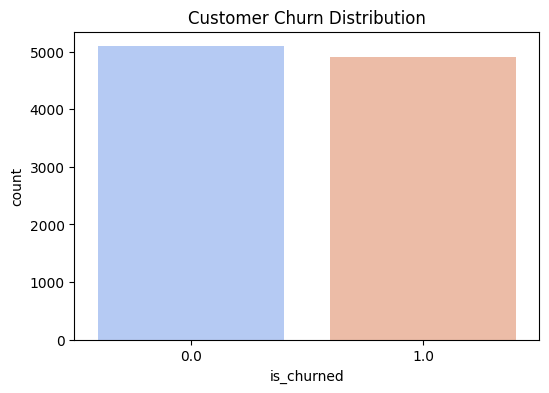

In [129]:
# Churn Rate Visualization
plt.figure(figsize=(6,4))
sns.countplot(x=new_dataset["is_churned"], palette="coolwarm")
plt.title("Customer Churn Distribution")
plt.show()

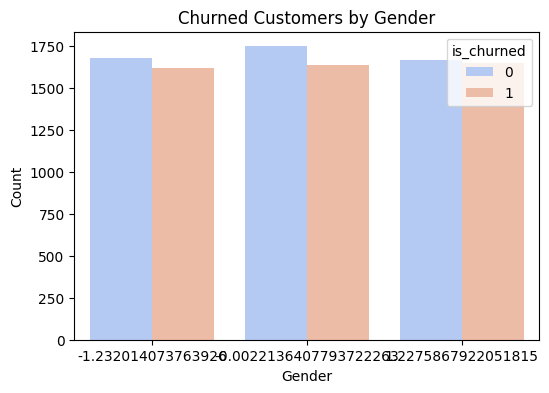

In [130]:
# Ensure new_dataset is defined
new_dataset = dataset.copy()

# Churned by Gender Visualization
plt.figure(figsize=(6, 4))
sns.countplot(data=new_dataset, x="gender", hue="is_churned", palette="coolwarm")
plt.title("Churned Customers by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

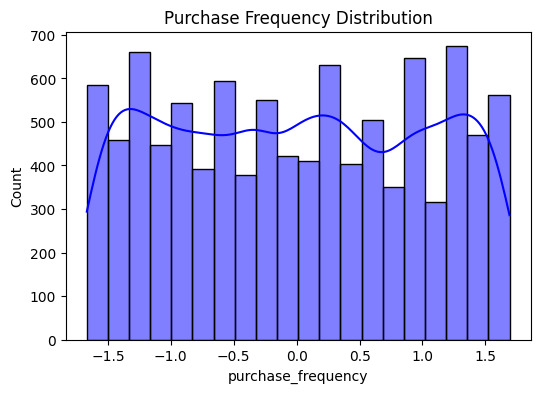

In [131]:
# Purchase Frequency Distribution
plt.figure(figsize=(6,4))
sns.histplot(new_dataset["purchase_frequency"], bins=20, kde=True, color="blue")
plt.title("Purchase Frequency Distribution")
plt.show()

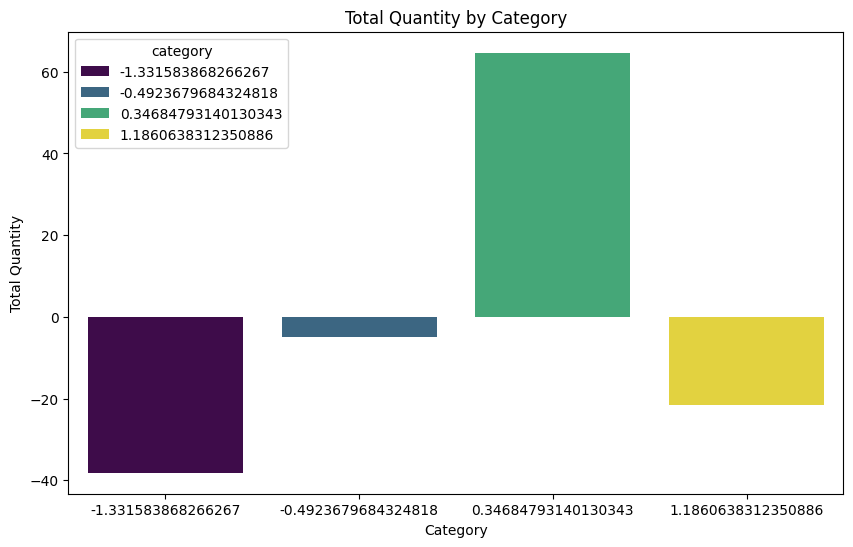

In [132]:
# Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(data=new_dataset.groupby('category')['quantity'].sum().reset_index(), x='category', y='quantity' ,hue='category' , palette='viridis')
plt.title('Total Quantity by Category')
#plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Total Quantity')
#plt.savefig('revenue_by_region.png')
plt.show()

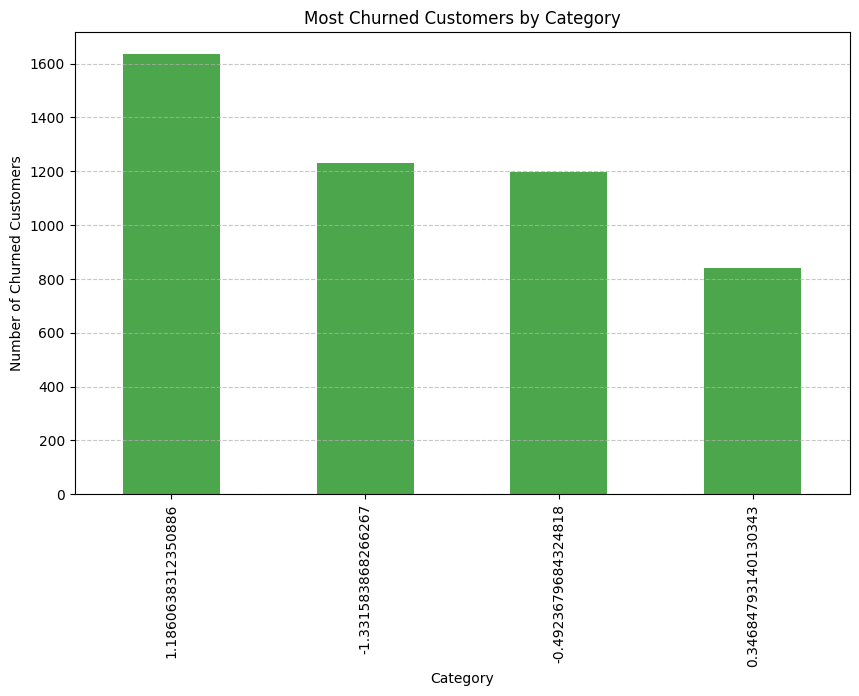

In [133]:
# Filter churned customers
churned_customers = new_dataset[new_dataset['is_churned'] == 1]

# Group by category and count churned customers
category_churn_counts = churned_customers.groupby('category').size().sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(10, 6))
category_churn_counts.plot(kind='bar', color='green', alpha=0.7)
plt.title('Most Churned Customers by Category')
plt.xlabel('Category')
plt.ylabel('Number of Churned Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

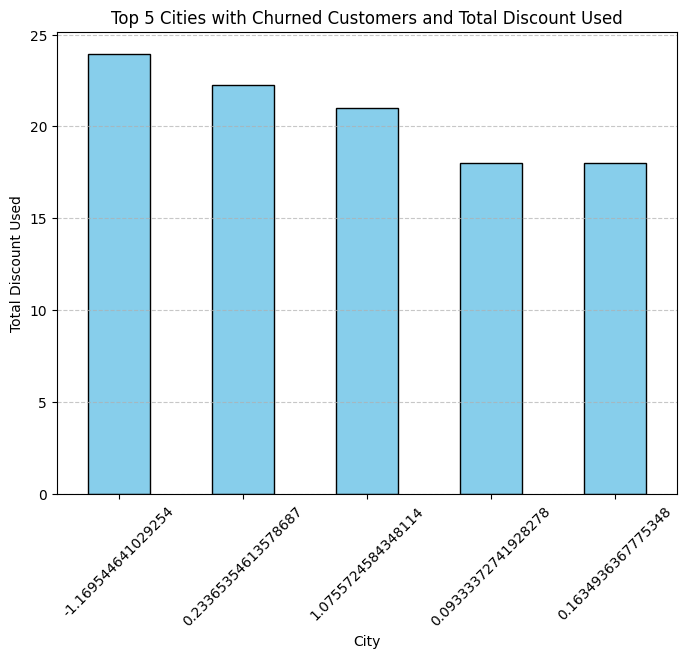

In [134]:
# Filter churned customers
churned_customers = new_dataset[new_dataset['is_churned'] == 1]

# Group by city and calculate total discount used
top_cities = churned_customers.groupby('city')['discount_used'].sum().nlargest(5)

# Plot the data
plt.figure(figsize=(8, 6))
top_cities.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 5 Cities with Churned Customers and Total Discount Used')
plt.xlabel('City')
plt.ylabel('Total Discount Used')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

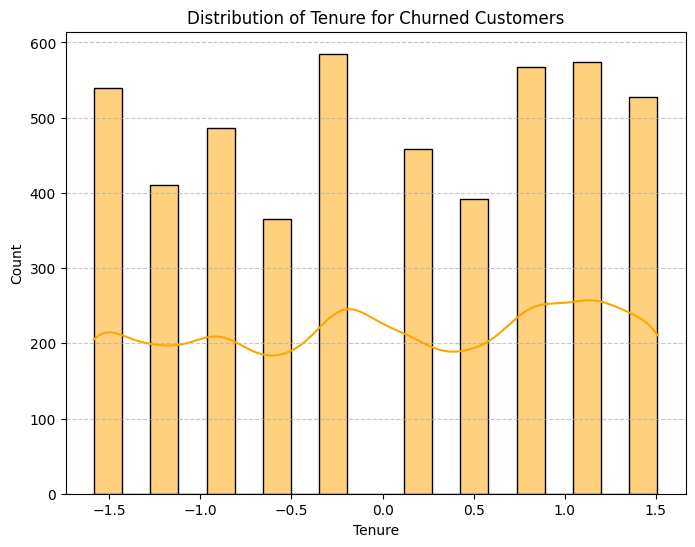

In [135]:
# Filter churned customers
churned_customers = new_dataset[new_dataset['is_churned'] == 1]

# Plot the distribution of tenure for churned customers
plt.figure(figsize=(8, 6))
sns.histplot(churned_customers['tenure'], bins=20, kde=True, color='orange')
plt.title('Distribution of Tenure for Churned Customers')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

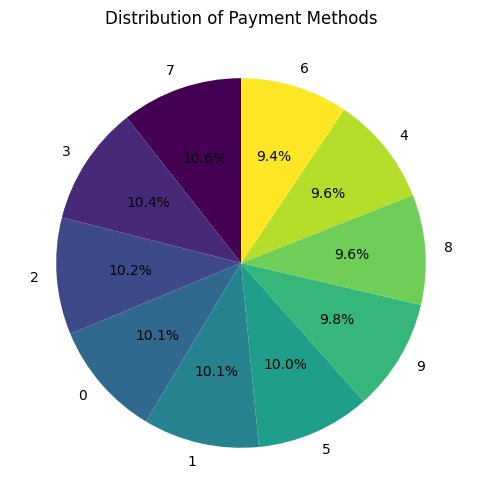

In [136]:
# Count the occurrences of each payment method
payment_method_counts = dataset['payment_method'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
payment_method_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis', legend=False)
plt.title('Distribution of Payment Methods')
plt.ylabel('')  # Remove y-axis label for better visualization
plt.show()

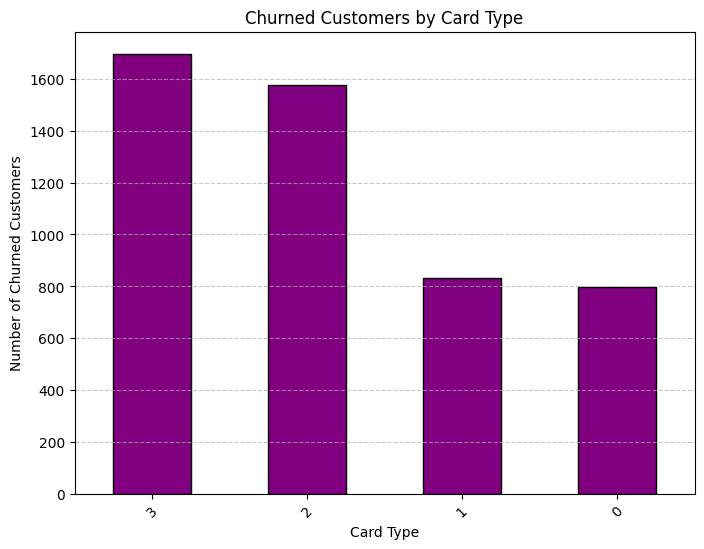

In [137]:
# Filter churned customers
churned_customers = new_dataset[new_dataset['is_churned'] == 1]

# Group by card type and count churned customers
card_type_churn_counts = churned_customers['card_type'].value_counts()

# Plot the data
plt.figure(figsize=(8, 6))
card_type_churn_counts.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Churned Customers by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Number of Churned Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Extract Input, Output Variables

In [138]:
# Define features and target variable

# Features or Input data or Independent Variable
x = encode_dataset.drop(["invoice_date","is_churned","last_purchase_date"], axis=1)

# Target(1 = churned, 0 = Not churned) or Output data or Dependent Variable
y = encode_dataset["is_churned"]

# Check if is_chrned Column is removed
x.head()
     

,category,item,quantity,price,month,year,quarter,is_holiday,gender,age,...,purchase_frequency,avg_purchase_value,city,province_state,country,payment_method,card_type,recency,purchase_per_tenure,discount_ratio
0,-0.492368,-0.434533,-1.329069,-0.556498,7,2023,12,0,-1.232014,-1.228115,...,0.320442,0.222170,-1.380024,0.229724,0.512275,4,2,0.618873,-0.374158,-0.623628
1,-1.331584,-1.014567,1.346191,-0.419132,0,2024,17,1,-0.002214,-0.906543,...,0.320442,-1.381175,-0.046986,0.346460,0.512275,0,2,1.703033,2.071564,-0.623628
2,1.186064,-0.724550,1.346191,0.404655,8,2022,9,0,-1.232014,-1.421058,...,1.143267,-0.584486,1.566692,-0.704162,-0.680727,8,2,0.866303,0.184865,-0.115951
3,-1.331584,-1.594602,-0.437316,-0.145627,4,2021,4,0,1.227587,-0.777914,...,0.183305,1.253934,-1.450184,1.864025,-0.680727,8,2,0.099458,0.394498,0.123815
4,0.346848,1.595588,-1.329069,-0.598198,3,2020,0,0,1.227587,-0.584971,...,0.389011,0.505608,-0.467946,-0.587426,0.512275,2,2,-0.384071,1.093276,0.598525


Split Dataset

In [139]:

# Train-test split (70-30 ratio)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
x_train.shape, x_test.shape

((7000, 23), (3000, 23))

In [140]:
x_train.head()

,category,item,quantity,price,month,year,quarter,is_holiday,gender,age,...,purchase_frequency,avg_purchase_value,city,province_state,country,payment_method,card_type,recency,purchase_per_tenure,discount_ratio
2228,-1.331584,-1.594602,0.454437,-0.825097,8,2021,5,0,-1.232014,0.251115,...,1.417542,1.061816,0.373973,-0.587426,0.512275,9,2,-0.701386,3.748631,-0.623628
5910,1.186064,1.305570,1.346191,2.137673,0,2020,1,0,-0.002214,-1.485372,...,-0.982364,-0.930888,0.724773,1.046874,-3.066730,7,3,-1.625000,-0.304280,-0.623628
1950,1.186064,1.305570,-1.329069,1.746017,0,2022,9,0,-0.002214,-0.520657,...,-1.050932,0.013065,0.654613,-0.587426,0.512275,2,3,1.570818,-0.548852,-0.623628
2119,0.346848,0.725536,0.454437,-1.162380,5,2020,2,0,-0.002214,0.829945,...,-0.228108,-0.020206,-1.239705,0.112989,0.512275,8,3,0.956964,1.233031,5.244726
5947,-0.492368,-0.434533,-0.437316,0.203103,11,2023,14,1,1.227587,-1.549687,...,1.486111,1.500451,0.584453,-0.237219,0.512275,1,0,-0.195192,2.211320,-0.623628


Train Model 

In [141]:

# Initialize and train the model
model = LogisticRegression()
model.fit(x_train, y_train)

c:\Users\QC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

In [142]:
# Predictions
y_pred = model.predict(x_test)
# Actual Vs Predicted Output
print("Actual Output:\n   ", y_test[:5])
print("Predicted Output:", y_pred[:5])

Actual Output:
    9953    0
3850    1
4962    1
3886    0
5437    0
Name: is_churned, dtype: int64
Predicted Output: [0 0 0 0 0]


In [143]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Full classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.55
Precision: 0.57
Recall: 0.44
              precision    recall  f1-score   support

           0       0.54      0.66      0.59      1483
           1       0.57      0.44      0.50      1517

    accuracy                           0.55      3000
   macro avg       0.55      0.55      0.54      3000
weighted avg       0.55      0.55      0.54      3000



In [144]:
# Train XGBoost Model
xgb = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
xgb.fit(x_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(x_test)

xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {xgb_accuracy:.2f}")

Accuracy: 0.98
